In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [13]:
synmerge = pd.read_table('data/breast_ttest_syndb_nonull_n2v8.tab.gz', index_col=0, compression='gzip')
synmerge.sort_values(by='product', ascending=False, inplace=True)

In [67]:
apop = pd.read_table('data/geneset_apoptosis.txt')

In [68]:
apop

,GO_APOPTOTIC_SIGNALING_PATHWAY
0,ABL1
1,ACVR1B
2,ADORA1
3,AEN
4,AIFM1
5,ANXA6
6,APAF1
7,APOPT1
8,APPL1
9,ARL6IP5


In [14]:
synmerge[synmerge['np_p_w']<0.01]

,PubmedID,cnv,exp,DiseaseScore,np_t_w,np_p_w,product
178,25171417,DSG2,GPRC5A,0.173,3.146285,0.002839,0.544307
191,25171417,BMP1,GNG12,0.161,-2.806464,0.006914,-0.451841
63,19490893,MAPK7,NRAS,0.461,-2.718840,0.008791,-1.253385
62,19490893,FBXW10,NRAS,0.464,-2.718840,0.008791,-1.261542
109,19490893,NMNAT1,NRAS,0.449,-2.922497,0.005062,-1.312201
97,19490893,MMEL1,NRAS,0.452,-3.072038,0.003327,-1.388561
51,19490893,EXOSC10,NRAS,0.476,-2.922497,0.005062,-1.391109
52,19490893,HMGN2,NRAS,0.476,-2.952300,0.004660,-1.405295
15,19490893,COPS3,NRAS,0.518,-2.787911,0.007309,-1.444138
11,20609354,EGR3,PDGFRA,0.518,-2.983689,0.009865,-1.545551


In [33]:
clove = pd.read_table('data/breast_ttest_nonull_n2v8.tab.gz', index_col=0, compression='gzip')

In [19]:
counts = pd.read_csv('data/brca_het_clDEG_count.tab.gz', sep='\t', compression='gzip', index_col=0)

In [30]:
counts['sum']=counts.sum(axis=1)

In [32]:
counts.sort_values(by='sum', ascending=False)

,TCGA-AR-A24V-01A,TCGA-A7-A26H-01A,TCGA-EW-A6SB-01A,TCGA-C8-A137-01A,TCGA-S3-A6ZG-01A,TCGA-BH-A42T-01A,TCGA-OL-A5RU-01A,TCGA-AQ-A54N-01A,TCGA-AO-A0J3-01A,TCGA-A7-A5ZV-01A,...,TCGA-AO-A1KT-01A,TCGA-AR-A24S-01A,TCGA-AO-A1KS-01A,TCGA-GM-A3XN-01A,TCGA-A2-A25E-01A,TCGA-E2-A15O-01A,TCGA-AR-A5QP-01A,TCGA-E9-A24A-01A,TCGA-AN-A0FJ-01A,sum
gene_id,,,,,,,,,,,,,,,,,,,,,
CDK1,23,2,22,7,10,21,0,25,29,17,...,29,33,17,0,12,7,1,0,30,14148
TROAP,14,3,25,8,25,25,0,27,29,9,...,21,27,23,2,10,11,8,3,22,13866
STIP1,24,5,21,9,22,18,0,25,20,9,...,24,27,25,1,5,4,2,5,21,13756
H2AFZ,18,4,19,9,14,19,0,29,30,9,...,24,25,18,2,10,6,1,4,19,13664
GINS1,16,4,20,13,23,20,0,24,25,8,...,20,30,23,2,7,10,5,4,22,13319
CCNB1,21,1,23,8,16,20,0,24,23,11,...,23,22,21,3,7,4,3,4,21,13044
CDC45,16,0,19,5,20,22,0,34,21,8,...,18,30,19,5,8,9,2,5,19,13016
CENPI,21,6,26,11,15,18,0,25,24,12,...,24,28,22,1,4,5,5,2,20,12877
KIAA0247,18,1,24,8,20,22,0,22,24,15,...,27,29,24,6,10,11,7,5,19,12772


In [46]:
clove[(clove['cnv'].str.contains('HRAS'))&(clove['np_p_w']<0.01)]

,cnv,exp,np_t_w,np_p_w
130645,HRAS,ALDH3B2,2.739304,0.009733
745705,HRAS,CRISPLD1,-2.991003,0.006963
754817,HRAS,CRYAB,-2.984925,0.005962
770763,HRAS,CSTA,2.741370,0.009467
866439,HRAS,CYR61,-2.768111,0.007629
2467873,HRAS,NT5E,-3.096584,0.003908
2916639,HRAS,RBM20,3.054297,0.007173
3458803,HRAS,TCN1,6.768866,0.000082
3802781,HRAS,XDH,2.870350,0.007211
3805059,HRAS,XIST,-2.772964,0.009065


In [51]:
clove.sort_values(by='np_t_w', ascending=False, inplace=True)

In [64]:
print('BRCA has 1021 cldeg sum')
clove[clove['cnv'].str.contains('BRCA1')]

BRCA has 1021 cldeg sum


,cnv,exp,np_t_w,np_p_w
1098166,BRCA1,ERBB2,3.489551,0.000950
2253112,BRCA1,MIEN1,3.273298,0.001809
1804346,BRCA1,KIAA1244,3.245058,0.002218
3499178,BRCA1,TH,3.108422,0.011090
571948,BRCA1,CEACAM6,3.064701,0.004248
3378444,BRCA1,STARD3,2.969373,0.004686
1369248,BRCA1,GATM,2.958250,0.006512
1269016,BRCA1,FMOD,2.908739,0.005670
1947860,BRCA1,LGALS3BP,2.876068,0.006133
2617592,BRCA1,PGAP3,2.836640,0.006758


In [66]:
clove[clove['cnv'].str.contains('PTEN')]

,cnv,exp,np_t_w,np_p_w


In [65]:
clove[clove['exp'].str.contains('ERBB2')]

,cnv,exp,np_t_w,np_p_w
1098864,KANSL1,ERBB2,5.470708,0.000001
1098126,ATP6V0A1,ERBB2,4.252779,0.000081
1098076,AOC2,ERBB2,4.252779,0.000081
1098078,AOC4,ERBB2,4.252779,0.000081
1098382,CNTNAP1,ERBB2,4.252779,0.000081
1099293,MLX,ERBB2,4.252779,0.000081
1099677,RAMP2-AS1,ERBB2,4.252779,0.000081
1100131,TUBG2,ERBB2,4.252779,0.000081
1100201,WNK4,ERBB2,4.252779,0.000081
1098981,LINC00671,ERBB2,4.252779,0.000081


## Apoptosis Net

In [74]:
apop_net = clove[(clove['exp'].isin(apop['GO_APOPTOTIC_SIGNALING_PATHWAY']))&(clove['cnv'].isin(apop['GO_APOPTOTIC_SIGNALING_PATHWAY']))]
apop_net = apop_net[(apop_net['np_p_w']<0.03) & (apop_net['np_t_w']>2)]

In [75]:
apop_net

,cnv,exp,np_t_w,np_p_w
742429,TNFRSF18,CRIP1,3.431314,0.001771
742432,TNFRSF4,CRIP1,3.431314,0.001771
742428,TNFRSF14,CRIP1,3.431314,0.001771
742167,SFN,CRIP1,3.261831,0.002760
742445,TP73,CRIP1,3.104535,0.004136
740613,CASP9,CRIP1,2.811350,0.008611
1638037,BCL2,IFI6,2.804430,0.007159
741683,MYBBP1A,CRIP1,2.706391,0.011112
742435,TNFSF12,CRIP1,2.706391,0.011112
741139,HIC1,CRIP1,2.706391,0.011112


/home/tjm/anaconda3/lib/python3.4/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/tjm/anaconda3/lib/python3.4/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/tjm/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/tjm/anaconda3/lib/python3.4/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated

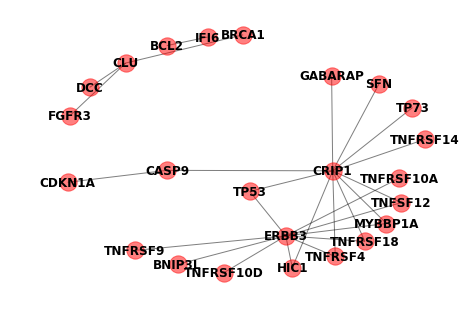

In [85]:
%matplotlib inline
apop_nx = nx.from_pandas_dataframe(df=apop_net, source='cnv', target='exp', edge_attr='np_t_w')

nx.draw(apop_nx, with_labels=True, font_weight='bold', alpha=0.5)
plt.savefig('fig_ch4.1_apoptosis_net.svg', format='svg')
plt.show()

In [99]:
apop_net = clove[(clove['exp'].isin(apop['GO_APOPTOTIC_SIGNALING_PATHWAY']))&(clove['cnv'].isin(apop['GO_APOPTOTIC_SIGNALING_PATHWAY']))]
apop_net_1 = apop_net[(apop_net['np_p_w']<0.03) & (apop_net['np_t_w']>2)]

In [100]:
apop_net.shape

(1011, 4)

/home/tjm/anaconda3/lib/python3.4/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/tjm/anaconda3/lib/python3.4/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/tjm/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/tjm/anaconda3/lib/python3.4/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated

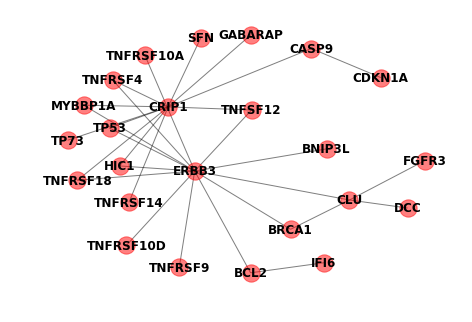

In [106]:
to_connect = ['FGFR3', 'DCC','CLU','BCL2','BRCA1']
to_connect = ['CLU','BCL2','BRCA1']
extras = apop_net[apop_net['cnv'].isin(to_connect)&apop_net['exp'].str.contains('ERBB3')]
extras
apop_net = pd.concat([apop_net_1, extras])

apop_net.shape
apop_nx = nx.from_pandas_dataframe(df=apop_net, source='cnv', target='exp', edge_attr='np_t_w')

nx.draw(apop_nx, with_labels=True, font_weight='bold', alpha=0.5)
# edge_labels=nx.draw_networkx_edge_labels(apop_nx,pos=nx.spring_layout(apop_nx))
plt.savefig('fig_ch4.1_apoptosis_net.svg', format='svg')
plt.show()

## Apoptosis Bipartite

In [107]:
from networkx.algorithms import bipartite

/home/tjm/anaconda3/lib/python3.4/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/tjm/anaconda3/lib/python3.4/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/tjm/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/tjm/anaconda3/lib/python3.4/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated

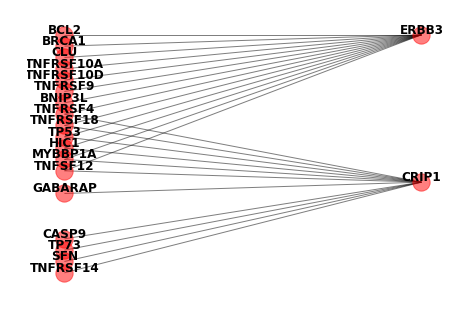

In [132]:
df=apop_net[apop_net['exp'].isin(['CRIP1','ERBB3'])]
# subdomain = exp
# domain = cnv
B = nx.Graph()
B.add_nodes_from(df['exp'], bipartite=0)
B.add_nodes_from(df['cnv'], bipartite=1)
B.add_weighted_edges_from(
    [(row['cnv'], row['exp'], round(row['np_t_w'], 2)) for idx, row in df.iterrows()], 
    weight='weight')

# print(B.edges(data=True))
# [('test1', 'example.org', {'weight': 1}), ('test3', 'example.org', {'weight': 1}), ('test2', 'example.org', {'weight': 1}), ('website.com', 'else', {'weight': 1}), ('site.com', 'something', {'weight': 1})]

pos = {node:[0, i] for i,node in enumerate(df['cnv'])}
pos.update({node:[1, i] for i,node in enumerate(df['exp'])})
nx.draw(B, pos, alpha=0.5, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.50
weights = [B[u][v]['weight'] for u,v in B.edges()]
nx.draw_networkx_labels(B, pos, width=weights, font_weight='bold')
plt.savefig('fig_ch4.1_apoptosis_bipartite_net.svg', format='svg')
plt.show()

In [124]:
B.edges()

[('TP53', 'CRIP1'),
 ('TP53', 'ERBB3'),
 ('GABARAP', 'CRIP1'),
 ('TNFRSF10A', 'ERBB3'),
 ('MYBBP1A', 'CRIP1'),
 ('MYBBP1A', 'ERBB3'),
 ('BRCA1', 'ERBB3'),
 ('BNIP3L', 'ERBB3'),
 ('CRIP1', 'TNFRSF18'),
 ('CRIP1', 'HIC1'),
 ('CRIP1', 'SFN'),
 ('CRIP1', 'TNFRSF14'),
 ('CRIP1', 'TNFRSF4'),
 ('CRIP1', 'CASP9'),
 ('CRIP1', 'TP73'),
 ('CRIP1', 'TNFSF12'),
 ('TNFRSF4', 'ERBB3'),
 ('TNFSF12', 'ERBB3'),
 ('BCL2', 'ERBB3'),
 ('TNFRSF18', 'ERBB3'),
 ('HIC1', 'ERBB3'),
 ('TNFRSF9', 'ERBB3'),
 ('TNFRSF10D', 'ERBB3'),
 ('CLU', 'ERBB3')]

In [130]:
weights = [B[u][v]['weight'] for u,v in B.edges()]

[2.45,
 2.34,
 2.55,
 2.26,
 2.71,
 2.41,
 1.8,
 2.31,
 3.43,
 2.71,
 3.26,
 3.43,
 3.43,
 2.81,
 3.1,
 2.71,
 2.33,
 2.41,
 1.73,
 2.33,
 2.41,
 2.3,
 2.26,
 2.21]

In [2]:
# from hopcroftkarp import HopcroftKarp

# """
# https://pypi.org/project/hopcroftkarp/1.2.3/
# """

# graph = {'a': {1}, 'b': {1, 2}, 'c': {1, 2}, 'd': {2, 3, 4}, 'e': {3, 4}, 'f': {4, 5, 6}, 'g': {5, 6, 7}, 'h': {8}}
# HopcroftKarp(graph).maximum_matching()

ImportError: No module named 'hopcroftkarp'